В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



Посилання на файл `process_bank_churn.py` в репозиторії https://github.com/LiubovRev/ML_hometasks/blob/main/decision_trees/process_bank_churn.py

In [7]:
from process_bank_churn import preprocess_data, preprocess_new_data

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [10]:
X_train, y_train, X_val, y_val, input_cols, scaler, encoder, numeric_cols, categorical_cols = preprocess_data(train_df, scaler_numeric=True)

In [11]:
numeric_cols = train_df.select_dtypes(include='number').columns.tolist()

if 'Exited' in numeric_cols:
    numeric_cols.remove('Exited')

categorical_cols = train_df.select_dtypes(include='object').columns.tolist()

if 'Surname' in categorical_cols:
    categorical_cols.remove('Surname')

In [12]:
X_test = preprocess_new_data(
    new_df=test_df,
    input_cols=input_cols,
    scaler=scaler,
    encoder=encoder,
    numeric_cols=numeric_cols,
    categorical_cols=categorical_cols,
    scale_numeric=True
)

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [13]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Передбачення ймовірностей для позитивного класу
train_probs = model.predict_proba(X_train)[:, 1]
val_probs = model.predict_proba(X_val)[:, 1]

# Обчислюємо AUC
train_auc = roc_auc_score(y_train, train_probs)
val_auc = roc_auc_score(y_val, val_probs)

print(f"Train ROC AUC: {train_auc:.4f}")
print(f"Validation ROC AUC: {val_auc:.4f}")


Train ROC AUC: 1.0000
Validation ROC AUC: 0.7688


In [15]:
print("Tree depth:", model.get_depth())


Tree depth: 23


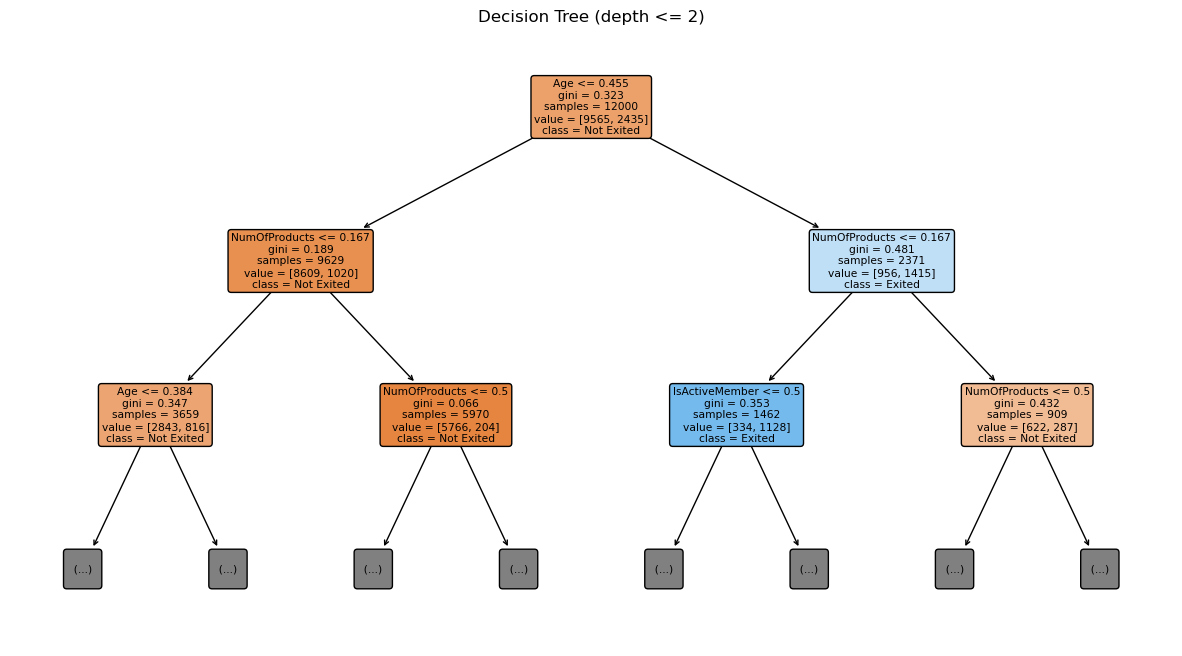

In [16]:
plt.figure(figsize=(15, 8))
plot_tree(model, 
          feature_names=X_train.columns, 
          class_names=['Not Exited', 'Exited'],
          max_depth=2,
          filled=True,
          rounded=True)
plt.title("Decision Tree (depth <= 2)")
plt.show()


In [17]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
})

# Сортуємо
importance_df = importance_df.sort_values(by='importance', ascending=False)


In [18]:
importance_df.head(10)


,feature,importance
3,Age,0.322013
6,NumOfProducts,0.170747
9,EstimatedSalary,0.083178
0,id,0.077607
2,CreditScore,0.075623
1,CustomerId,0.072957
5,Balance,0.067920
4,Tenure,0.039541
8,IsActiveMember,0.036560
11,Geography_Germany,0.017126


/tmp/ipykernel_59645/2563872392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='importance', y='feature', palette='viridis')


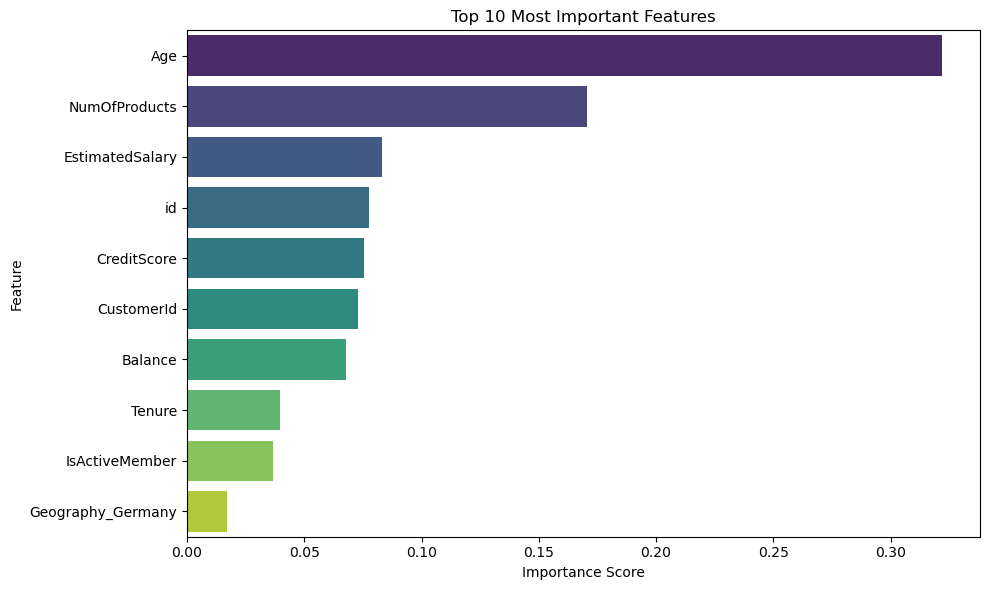

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='importance', y='feature', palette='viridis')
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

def evaluate_tree(max_depth=None, max_leaf_nodes=None):
    model = DecisionTreeClassifier(
        random_state=42,
        max_depth=max_depth,
        max_leaf_nodes=max_leaf_nodes
    )
    model.fit(X_train, y_train)

    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    val_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    print(f"max_depth={max_depth}, max_leaf_nodes={max_leaf_nodes} | Train AUC: {train_auc:.4f} | Val AUC: {val_auc:.4f}")
    return model, train_auc, val_auc


In [28]:
evaluate_tree(max_depth=4)

evaluate_tree(max_depth=3)

evaluate_tree(max_leaf_nodes=10)

evaluate_tree(max_depth=4, max_leaf_nodes=10)

evaluate_tree(max_depth=6, max_leaf_nodes=20)

evaluate_tree(max_leaf_nodes=30)

evaluate_tree(max_depth=5)

max_depth=4, max_leaf_nodes=None | Train AUC: 0.9100 | Val AUC: 0.9165
max_depth=3, max_leaf_nodes=None | Train AUC: 0.8943 | Val AUC: 0.9031
max_depth=None, max_leaf_nodes=10 | Train AUC: 0.8995 | Val AUC: 0.9080
max_depth=4, max_leaf_nodes=10 | Train AUC: 0.8994 | Val AUC: 0.9082
max_depth=6, max_leaf_nodes=20 | Train AUC: 0.9167 | Val AUC: 0.9219
max_depth=None, max_leaf_nodes=30 | Train AUC: 0.9201 | Val AUC: 0.9235
max_depth=5, max_leaf_nodes=None | Train AUC: 0.9240 | Val AUC: 0.9256


(DecisionTreeClassifier(max_depth=5, random_state=42),
 0.9239751790140087,
 0.9256072354760319)

In [22]:
results = []

for depth in [3, 4, 5]:
    for leaves in [10, 20, None]:
        model, train_auc, val_auc = evaluate_tree(max_depth=depth, max_leaf_nodes=leaves)
        results.append({
            "max_depth": depth,
            "max_leaf_nodes": leaves,
            "train_auc": train_auc,
            "val_auc": val_auc
        })

results_df = pd.DataFrame(results).sort_values("val_auc", ascending=False)
print(results_df)

max_depth=3, max_leaf_nodes=10 | Train AUC: 0.8943 | Val AUC: 0.9031
max_depth=3, max_leaf_nodes=20 | Train AUC: 0.8943 | Val AUC: 0.9031
max_depth=3, max_leaf_nodes=None | Train AUC: 0.8943 | Val AUC: 0.9031
max_depth=4, max_leaf_nodes=10 | Train AUC: 0.8994 | Val AUC: 0.9082
max_depth=4, max_leaf_nodes=20 | Train AUC: 0.9100 | Val AUC: 0.9165
max_depth=4, max_leaf_nodes=None | Train AUC: 0.9100 | Val AUC: 0.9165
max_depth=5, max_leaf_nodes=10 | Train AUC: 0.8995 | Val AUC: 0.9080
max_depth=5, max_leaf_nodes=20 | Train AUC: 0.9153 | Val AUC: 0.9211
max_depth=5, max_leaf_nodes=None | Train AUC: 0.9240 | Val AUC: 0.9256
   max_depth  max_leaf_nodes  train_auc   val_auc
8          5             NaN   0.923975  0.925607
7          5            20.0   0.915315  0.921087
4          4            20.0   0.910025  0.916451
5          4             NaN   0.910025  0.916451
3          4            10.0   0.899351  0.908151
6          5            10.0   0.899502  0.908042
0          3           

In [ ]:
best_model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, random_state=42)
best_model.fit(X_train, y_train)


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [23]:
train_aucs = []
val_aucs = []
depth_range = list(range(1, 21))

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_proba = model.predict_proba(X_train)[:, 1]
    val_proba = model.predict_proba(X_val)[:, 1]

    train_auc = roc_auc_score(y_train, train_proba)
    val_auc = roc_auc_score(y_val, val_proba)

    train_aucs.append(train_auc)
    val_aucs.append(val_auc)

    print(f"Depth: {depth:2d} | Train AUC: {train_auc:.4f} | Val AUC: {val_auc:.4f}")


Depth:  1 | Train AUC: 0.7406 | Val AUC: 0.7513
Depth:  2 | Train AUC: 0.8421 | Val AUC: 0.8499
Depth:  3 | Train AUC: 0.8943 | Val AUC: 0.9031
Depth:  4 | Train AUC: 0.9100 | Val AUC: 0.9165
Depth:  5 | Train AUC: 0.9240 | Val AUC: 0.9256
Depth:  6 | Train AUC: 0.9328 | Val AUC: 0.9236
Depth:  7 | Train AUC: 0.9406 | Val AUC: 0.9146
Depth:  8 | Train AUC: 0.9501 | Val AUC: 0.9015
Depth:  9 | Train AUC: 0.9601 | Val AUC: 0.8789
Depth: 10 | Train AUC: 0.9711 | Val AUC: 0.8544
Depth: 11 | Train AUC: 0.9806 | Val AUC: 0.8264
Depth: 12 | Train AUC: 0.9875 | Val AUC: 0.8031
Depth: 13 | Train AUC: 0.9925 | Val AUC: 0.7896
Depth: 14 | Train AUC: 0.9955 | Val AUC: 0.7970
Depth: 15 | Train AUC: 0.9974 | Val AUC: 0.7867
Depth: 16 | Train AUC: 0.9988 | Val AUC: 0.7796
Depth: 17 | Train AUC: 0.9994 | Val AUC: 0.7822
Depth: 18 | Train AUC: 0.9997 | Val AUC: 0.7772
Depth: 19 | Train AUC: 0.9999 | Val AUC: 0.7785
Depth: 20 | Train AUC: 1.0000 | Val AUC: 0.7747


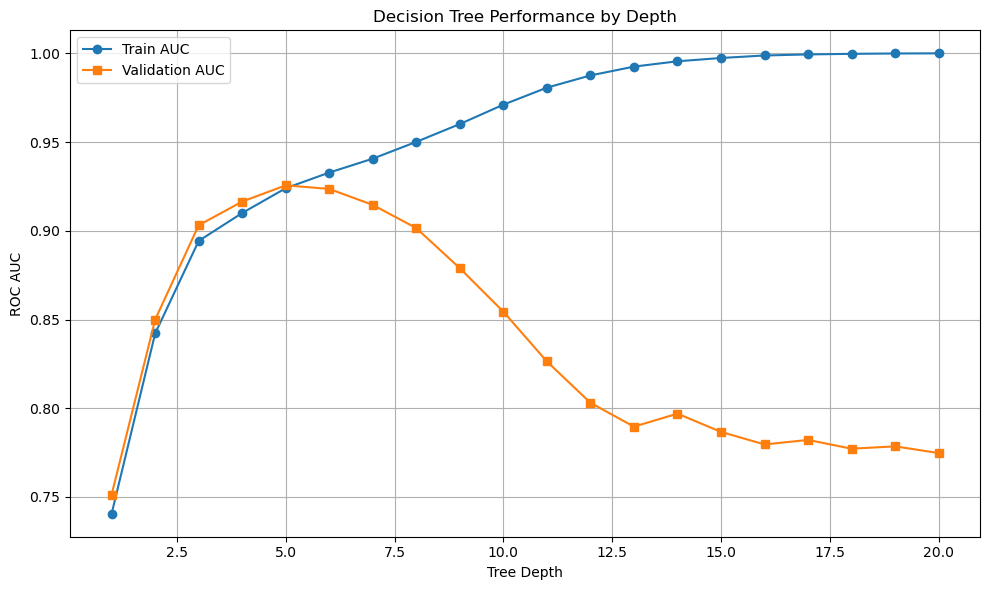

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_aucs, label='Train AUC', marker='o')
plt.plot(depth_range, val_aucs, label='Validation AUC', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel('ROC AUC')
plt.title('Decision Tree Performance by Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Інтерпретація:

- Найкращий max_depth - 5  
- Train AUC зростає, а Val AUC падає - модель перенавчається (overfitting).


**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [25]:
best_depth = 5  

final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [27]:
import pandas as pd
from process_bank_churn import preprocess_new_data

test_df = pd.read_csv('test.csv')

numeric_cols = X_train.select_dtypes(include='number').columns.tolist()
categorical_cols = [col for col in input_cols if col not in numeric_cols]

# X_test = preprocess_new_data(
#     new_df=test_df,
#     input_cols=input_cols,
#     scaler=scaler,
#     encoder=encoder,
#     numeric_cols=numeric_cols,
#     categorical_cols=categorical_cols,
#     scale_numeric=True
# )

KeyError: "['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'] not in index"

In [29]:
test_probs = final_model.predict_proba(X_test)[:, 1]


In [30]:
submission = pd.DataFrame({
    'CustomerId': test_df['CustomerId'],
    'Exited': test_probs  # або .astype(int) якщо потрібен клас
})

submission.to_csv('submission.csv', index=False)
print("submission.csv saved.")


submission.csv saved.
